# Question 3.a

In [9]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 1
log_interval = 10
batch_size = 64
test_batch_size = 1000
torch.manual_seed(seed)

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=test_batch_size, shuffle=True)


In [3]:
# Training settings
epochs = 9
lr = 0.1

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

In [6]:
def train(epoch):
    model.train()
    batch_count = 0
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        total_loss += loss.data[0]
        batch_count +=1
        loss.backward()
        optimizer.step()
        #if batch_idx % log_interval == 0:
            #print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            #    epoch, batch_idx * len(data), len(train_loader.dataset),
            #    100. * batch_idx / len(train_loader), loss.data[0]))
    avg_loss = total_loss/batch_count
    print('Train loss for epoch:{0}: {1}'.format(epoch, avg_loss))
    return avg_loss


def test():
    # TODO: Test the model on the test-set and report the loss and accuracy.
    correct = 0
    total = 0
    total_loss = 0
    batch_count = 0
    
    # Loop through the test loader in batches of 1000
    for data in test_loader:
        images, labels = data
        #images, labels = Variable(images), Variable(labels)
        output = model(Variable(images))
        
        # Calculate NLL loss
        loss = F.nll_loss(output, Variable(labels))

        # Add it to the total loss
        total_loss += loss.data[0]
        batch_count += 1
        
        # Calculate class predictions
        _, prediction = torch.max(output.data, 1)
        batch_corr = (prediction == labels).sum()
        #print('Batch correct: {0}, Batch size: {1}'.format(batch_corr, labels.size(0)))
        correct += batch_corr
        total += labels.size(0)

    acc = 100*correct/total
    print('Accuracy: {:.2f}'.format(acc))
    avg_loss = total_loss/batch_count
    print('Avg Test loss: {0}'.format(avg_loss))
    return avg_loss
    
train_loss = []
test_loss = []
for epoch in range(1, epochs + 1):
    train_loss.append(train(epoch))
    test_loss.append(test())
                 


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train loss for epoch:1: 0.1445738951206954
Accuracy: 95.62
Avg Test loss: 0.14839309006929396
Train loss for epoch:2: 0.14359392654170583
Accuracy: 95.80
Avg Test loss: 0.1483381763100624
Train loss for epoch:3: 0.1396406494519874
Accuracy: 96.14
Avg Test loss: 0.14087455049157144
Train loss for epoch:4: 0.1361090848738673
Accuracy: 95.34
Avg Test loss: 0.16009698957204818
Train loss for epoch:5: 0.13229596595972903
Accuracy: 96.55
Avg Test loss: 0.12261295318603516
Train loss for epoch:6: 0.13283343903515846
Accuracy: 96.20
Avg Test loss: 0.12719205915927886
Train loss for epoch:7: 0.1262872539307259
Accuracy: 96.15
Avg Test loss: 0.12773193046450615
Train loss for epoch:8: 0.12612260686857169
Accuracy: 95.81
Avg Test loss: 0.14521103650331496
Train loss for epoch:9: 0.1270634271919346
Accuracy: 96.37
Avg Test loss: 0.1246478572487831


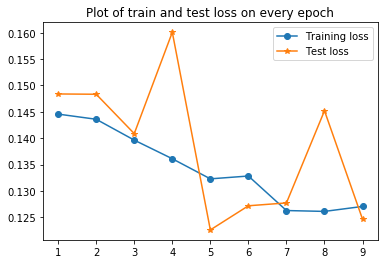

In [13]:
plt.figure()
plt.plot(range(1, epochs+1), train_loss, '-o', label = "Training loss" )
plt.plot(range(1, epochs+1), test_loss, '-*', label = "Test loss")
plt.legend()
plt.title('Plot of train and test loss on every epoch')


## Report

Changes to code:
- The test() had the code enhancements.
- The code loops through the test loader in batches of size 1000.
- The output is calculated using net model which returns a softmax output of probabilities.
- Negative log likelihood loss is found based on output and labels.
- Total loss is calculated to find average later.
- The index of max value per row is found to assign the predicted class.
- Correct outputs are accumulated to find accuracy later.
- All the test and train losses are appended in a list to plot the above figure.

# Question 3.b

In [26]:
# Parameters
epochs = 9
batch_sizes = [64, 32, 128]
learning_rates = [ 0.1, 0.01, 0.05, 0.5]
momentum = [0, 0.9 ]
weight_decay = [0, 0.1]
dampening = [0]
nesterov = [False]

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [23]:
def train(train_loader):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
    return test(train_loader)


def test(test_loader):
    # TODO: Test the model on the test-set and report the loss and accuracy.
    correct = 0
    total = 0
    total_loss = 0
    batch_count = 0
    for data in test_loader:
        images, labels = data
        #images, labels = Variable(images), Variable(labels)
        output = model(Variable(images))
        
        loss = F.nll_loss(output, Variable(labels))
        #print('Loss: {0}'.format(loss.data[0]))
        total_loss += loss.data[0]
        batch_count += 1
        _, prediction = torch.max(output.data, 1)
        batch_corr = (prediction == labels).sum()
        #print('Batch correct: {0}, Batch size: {1}'.format(batch_corr, labels.size(0)))
        correct += batch_corr
        total += labels.size(0)

    acc = 100*correct/total
    #print('Accuracy: {:.2f}'.format(acc))
    error = 100-acc
    avg_loss = total_loss/batch_count
    #print('Avg Test loss for epoch {0}: {1}'.format(epoch, avg_loss))
    return avg_loss, error

In [27]:
for batch_size in batch_sizes:
    for lr in learning_rates:
        for m in momentum:
            for decay in weight_decay:
                for damp in dampening:
                    for is_nest in nesterov:
                        seed = 1
                        log_interval = 10
                        test_batch_size = 1000
                        torch.manual_seed(seed)

                        train_loader = torch.utils.data.DataLoader(
                            datasets.MNIST('../data', train=True, download=True,
                                           transform=transforms.Compose([
                                               transforms.ToTensor(),
                                               transforms.Normalize((0.1307,), (0.3081,))
                                           ])),
                            batch_size=batch_size, shuffle=True)
                        test_loader = torch.utils.data.DataLoader(
                            datasets.MNIST('../data', train=False, transform=transforms.Compose([
                                               transforms.ToTensor(),
                                               transforms.Normalize((0.1307,), (0.3081,))
                                           ])),
                            batch_size=test_batch_size, shuffle=True)
                        
                        # Initialize Model and optimizer
                        model = Net()
                        optimizer = optim.SGD(model.parameters(), lr = lr, momentum = m, 
                                              weight_decay = decay, dampening = damp, nesterov = is_nest)
                        

                        for epoch in range(1, epochs + 1):
                            train_loss, train_error = train(train_loader)
                            if train_loss < 0.13:
                                break
                            #test_loss.append(test())
                        test_loss, test_error = test(test_loader)
                        print('Final epoch: {0}, train loss: {9}, train error: {1}, test error: {2} for parameters: batch_size = {3}, lr = {4}, momentum = {5}, decay = {6}, dampening = {7}, nest = {8}'.format(epoch,
                        train_error, test_error, batch_size, lr, m, decay, damp, is_nest, train_loss))
                        



/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Final epoch: 9, train loss: 0.14741937276611386, train error: 4.239999999999995, test error: 4.010000000000005 for parameters: batch_size = 64, lr = 0.1, momentum = 0, decay = 0, dampening = 0, nest = False
Final epoch: 9, train loss: 0.6886434673881734, train error: 21.441666666666663, test error: 20.510000000000005 for parameters: batch_size = 64, lr = 0.1, momentum = 0, decay = 0.1, dampening = 0, nest = False
Final epoch: 9, train loss: 2.3119377284161824, train error: 90.07, test error: 89.68 for parameters: batch_size = 64, lr = 0.1, momentum = 0.9, decay = 0, dampening = 0, nest = False
Final epoch: 9, train loss: 1.3342442452780474, train error: 44.891666666666666, test error: 45.37 for parameters: batch_size = 64, lr = 0.1, momentum = 0.9, decay = 0.1, dampening = 0, nest = False
Final epoch: 9, train loss: 0.22110817723198614, train error: 6.541666666666671, test error: 5.909999999999997 for parameters: batch_size = 64, lr = 0.01, momentum = 0, decay = 0, dampening = 0, nest 

KeyboardInterrupt: 

## Report for 3.b

- Various parameters like batch_size, learning rate, momentum, weight decay were changed to find best results. 
- Dampening and Nesterov momentum were avoided as Nesterow required momentum>0 and dampening =0. This was difficult to manage in the for loop.
- The best parameters found are: batch_size = 64, learning rate = 0.1, momentum = 0, weight decay = 0, dampening = 0, nesterov = False.
- The best parameters are decided based on training loss, training error and testing error.